# Quem será o campeão da Copa do Mundo de 2026?

- Histórico de jogo


In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
decision = pd.read_csv('dados_ciclo_basic\decision.csv.csv')
fifa_ranking_2024_6 = pd.read_csv('dados_ciclo_basic/dados_copadomundo/fifa_ranking-2024-06-20.csv')
fifa_results = pd.read_csv('dados_ciclo_basic/FIFA Results.csv')
matches = pd.read_csv('dados_ciclo_basic\dados_copadomundo\matches_1930_2022.csv')
penalty = pd.read_csv('dados_ciclo_basic\penality kick.csv.csv')
world_cup = pd.read_csv('dados_ciclo_basic\dados_copadomundo\world_cup.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9156\2430298511.py:1: SyntaxWarning: invalid escape sequence '\d'
  decision = pd.read_csv('dados_ciclo_basic\decision.csv.csv')
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9156\2430298511.py:4: SyntaxWarning: invalid escape sequence '\d'
  matches = pd.read_csv('dados_ciclo_basic\dados_copadomundo\matches_1930_2022.csv')
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9156\2430298511.py:5: SyntaxWarning: invalid escape sequence '\p'
  penalty = pd.read_csv('dados_ciclo_basic\penality kick.csv.csv')
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9156\24

In [256]:
fifa_ranking_2024_6.head()
print(fifa_ranking_2024_6['country_full'].nunique())
fifa_ranking_2024_6.sort_values(by='total_points', ascending=False).head(10)

216


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
57868,1.0,Germany,GER,2172.0,2187.0,0,UEFA,2018-07-01
57867,2.0,France,FRA,2164.0,2134.0,-2,UEFA,2018-07-01
57866,3.0,Portugal,POR,2163.0,2155.0,1,UEFA,2018-07-01
57844,4.0,Brazil,BRA,2160.0,2151.0,1,CONMEBOL,2018-07-01
57864,5.0,Belgium,BEL,2124.0,2098.0,-1,UEFA,2018-07-01
57863,6.0,Spain,ESP,2104.0,2082.0,-2,UEFA,2018-07-01
57862,7.0,England,ENG,2099.0,2074.0,-2,UEFA,2018-07-01
57861,8.0,Switzerland,SUI,2087.0,2065.0,-2,UEFA,2018-07-01
57860,9.0,Argentina,ARG,2080.0,2117.0,4,CONMEBOL,2018-07-01
57859,10.0,Mexico,MEX,2041.0,1996.0,-5,CONCACAF,2018-07-01


In [257]:
decision.info()

home_counts = decision['home_team'].value_counts()
away_counts = decision['away_team'].value_counts()
total_counts = home_counts.add(away_counts, fill_value=0).sort_values(ascending=False)

goals_scored = decision.groupby('home_team')['home_score'].sum().add(
    decision.groupby('away_team')['away_score'].sum(), fill_value=0
).sort_values(ascending=False)

decision['winner'] = decision.apply(
    lambda row: row['home_team'] if row['home_score'] > row['away_score']
    else row['away_team'] if row['away_score'] > row['home_score']
    else 'Draw', axis=1)

win_counts = decision['winner'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
 6   city        44353 non-null  object
 7   country     44353 non-null  object
 8   neutral     44353 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [258]:
goals_scored.head(10)

England        2295.0
Brazil         2236.0
Germany        2211.0
Sweden         2062.0
Hungary        1952.0
Argentina      1895.0
Netherlands    1706.0
Mexico         1636.0
South Korea    1580.0
France         1578.0
dtype: float64

In [259]:
win_counts

winner
Draw                 10210
Brazil                 654
England                597
Germany                574
Argentina              551
                     ...  
Chagos Islands           1
Surrey                   1
Kabylia                  1
Mapuche                  1
Brunei Darussalam        1
Name: count, Length: 303, dtype: int64

In [260]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

In [262]:
copa_decision = decision[decision['tournament'] == 'FIFA World Cup']

cup_teams = pd.concat([copa_decision['home_team'], copa_decision['away_team']])
cup_team_counts = cup_teams.value_counts()

cup_goals = copa_decision.groupby('home_team')['home_score'].sum().add(
    copa_decision.groupby('away_team')['away_score'].sum(), fill_value=0
).sort_values(ascending=False)


In [263]:
top_scorers = fifa_results.groupby(['team', 'scorer']).size().sort_values(ascending=False).head(10)
top_scorers

team                 scorer            
Portugal             Cristiano Ronaldo     91
Poland               Robert Lewandowski    56
Argentina            Lionel Messi          54
Iran                 Ali Daei              49
Germany              Miroslav Klose        48
Guatemala            Carlos Ruiz           47
Uruguay              Luis Suárez           46
Sweden               Zlatan Ibrahimović    44
Republic of Ireland  Robbie Keane          44
England              Harry Kane            44
dtype: int64

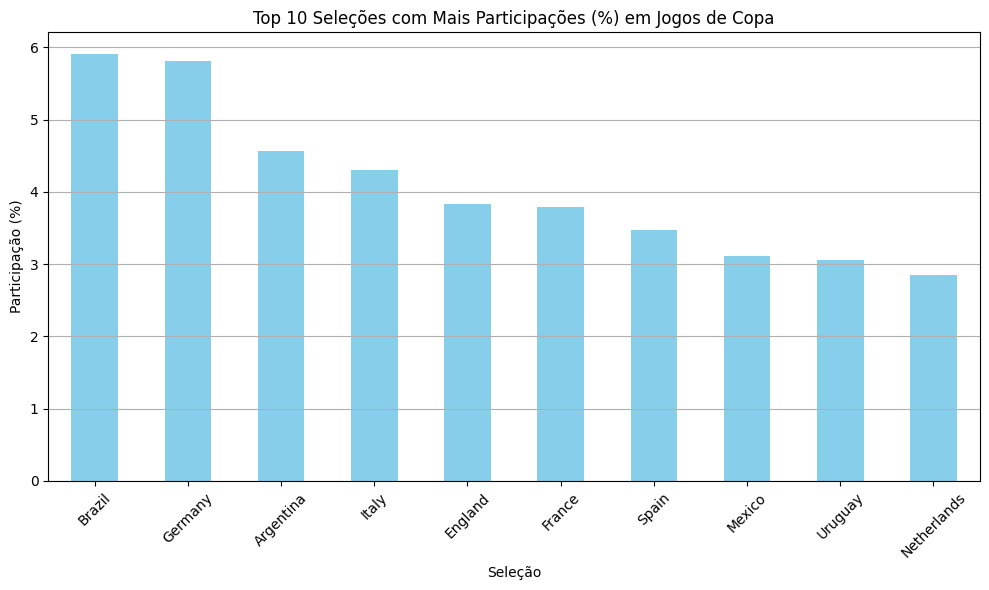

In [264]:
top_teams = cup_team_counts.head(10)
top_teams_percent = (top_teams / cup_team_counts.sum()) * 100  
plt.figure(figsize=(10,6))
top_teams_percent.plot(kind='bar', color='skyblue')
plt.title('Top 10 Seleções com Mais Participações (%) em Jogos de Copa')
plt.xlabel('Seleção')
plt.ylabel('Participação (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


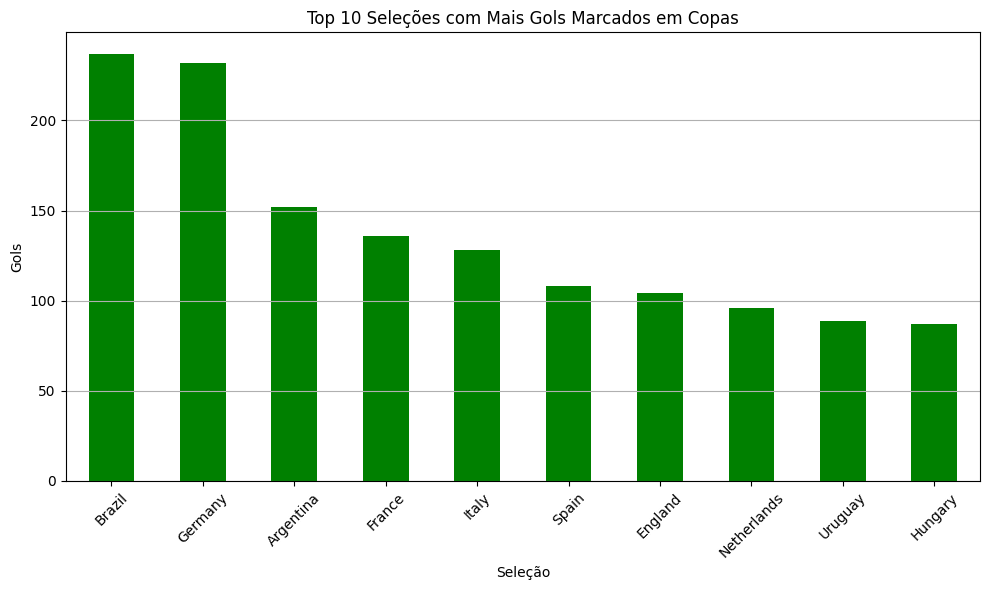

In [265]:
top_scorers = cup_goals.head(10)
plt.figure(figsize=(10,6))
top_scorers.plot(kind='bar', color='green')
plt.title('Top 10 Seleções com Mais Gols Marcados em Copas')
plt.xlabel('Seleção')
plt.ylabel('Gols')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

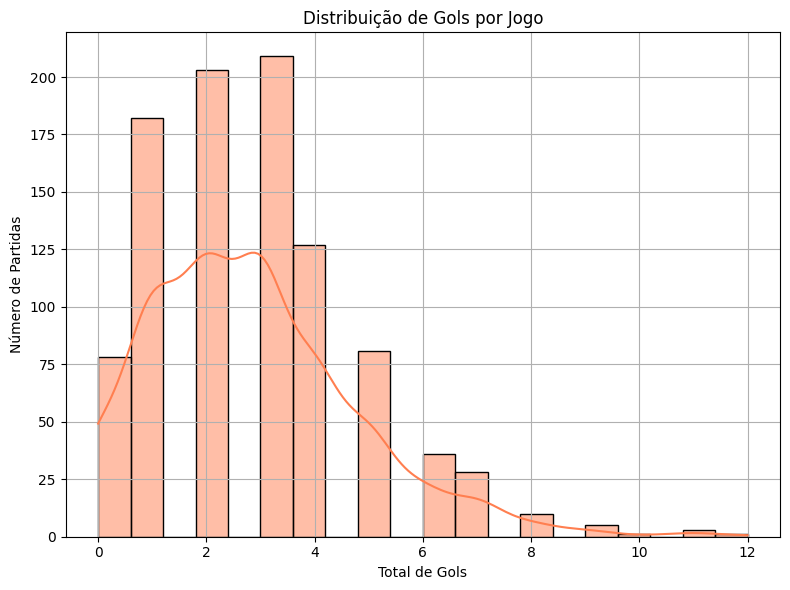

In [ ]:
matches['total_goals'] = matches['home_score'] + matches['away_score']

plt.figure(figsize=(8,6))
sns.histplot(matches['total_goals'], bins=20, kde=True, color='coral')
plt.title('Distribuição de Gols por Jogo')
plt.xlabel('Total de Gols')
plt.ylabel('Número de Partidas')
plt.grid(True)
plt.tight_layout()
plt.show()


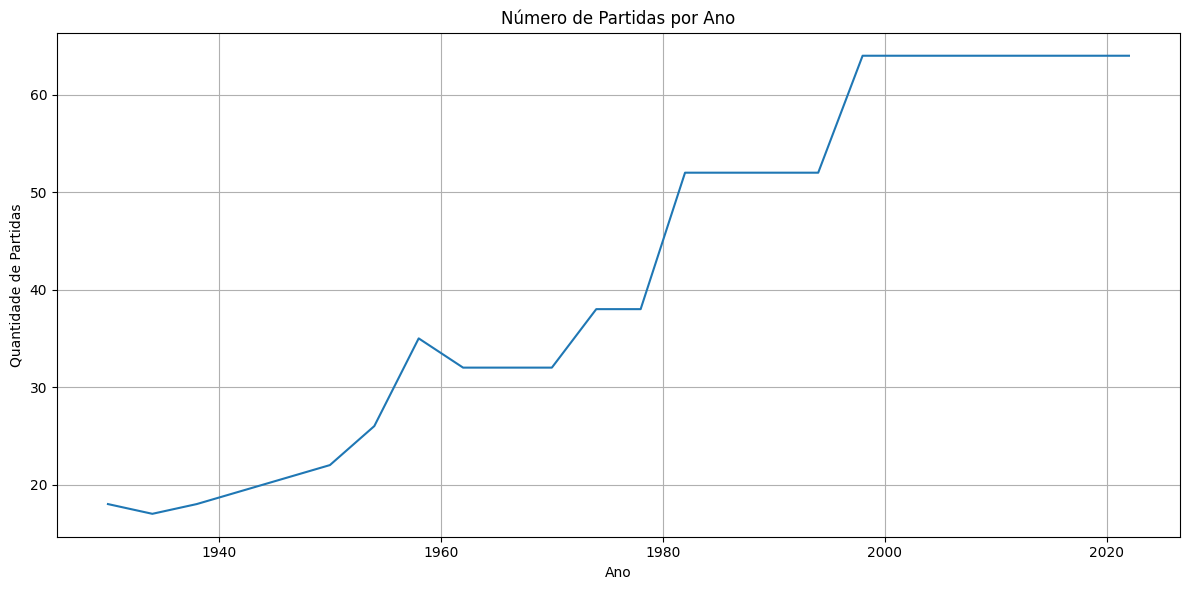

In [267]:
matches['year'] = pd.to_datetime(matches['home_team'].index).year if 'year' not in matches else matches['year']
matches['match_year'] = pd.to_datetime(matches['Date']).dt.year

games_per_year = matches.groupby('match_year').size()

plt.figure(figsize=(12,6))
games_per_year.plot()
plt.title('Número de Partidas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Partidas')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9156\2953776269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copa['year'] = pd.to_datetime(copa['date']).dt.year


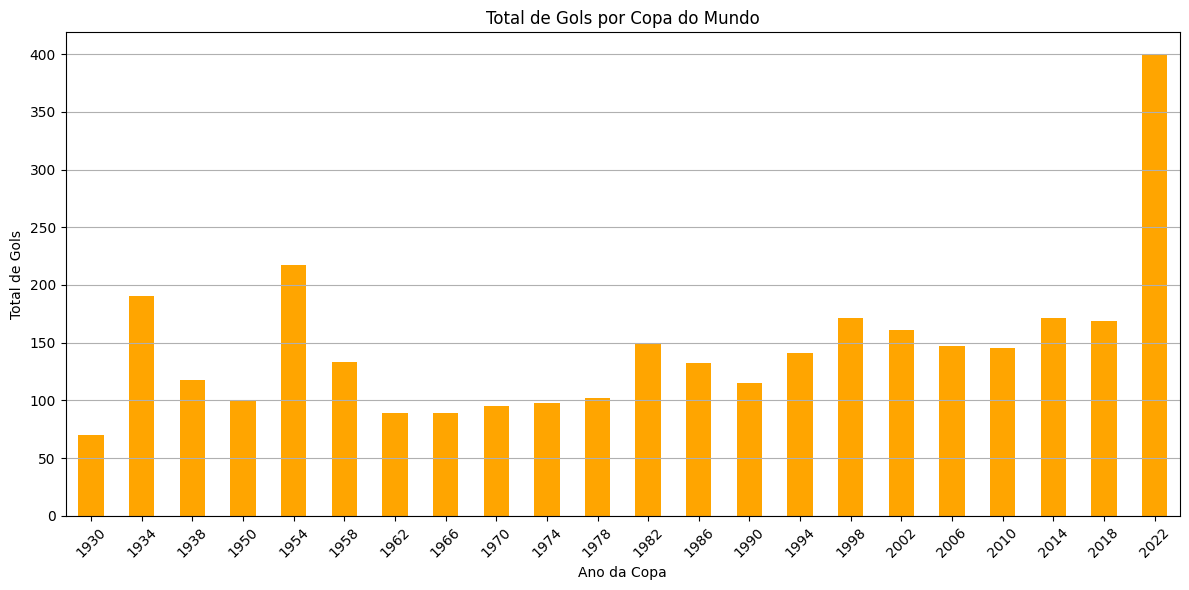

In [268]:
anos_copa = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
              1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022]

copa = decision[
    decision['tournament'].str.contains("FIFA World Cup", na=False)
]
copa['year'] = pd.to_datetime(copa['date']).dt.year
copa = copa[copa['year'].isin(anos_copa)] 

gols_por_copa = copa.groupby('year')[['home_score', 'away_score']].sum()
gols_por_copa['total'] = gols_por_copa['home_score'] + gols_por_copa['away_score']

plt.figure(figsize=(12,6))
gols_por_copa['total'].plot(kind='bar', color='orange')
plt.title('Total de Gols por Copa do Mundo')
plt.xlabel('Ano da Copa')
plt.ylabel('Total de Gols')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

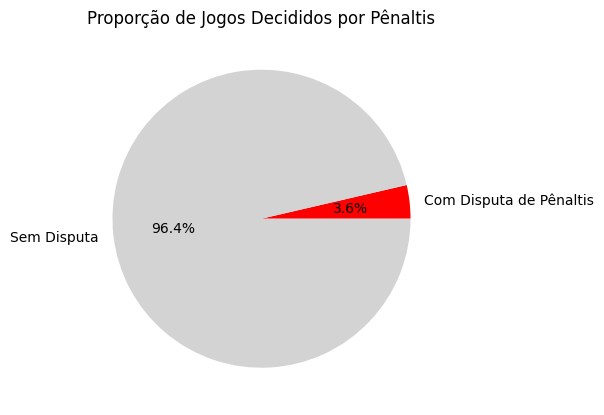

In [269]:
penalty_decisions = matches['home_penalty'].notna() | matches['away_penalty'].notna()

proporcao_penaltis = penalty_decisions.mean()

plt.figure(figsize=(6,6))
plt.pie([proporcao_penaltis, 1 - proporcao_penaltis],
        labels=['Com Disputa de Pênaltis', 'Sem Disputa'],
        autopct='%1.1f%%',
        colors=['red', 'lightgray'])
plt.title('Proporção de Jogos Decididos por Pênaltis')
plt.tight_layout()
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9156\3757146638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penalty_games['penalty_winner'] = penalty_games.apply(


Seleções diferentes que já venceram disputas de pênaltis: 22

Seleções:
['Argentina' 'Croatia' 'Morocco' 'England' 'Russia' 'Netherlands'
 'Costa Rica' 'Brazil' 'Uruguay' 'Paraguay' 'Italy' 'Portugal' 'Germany'
 'Ukraine' 'Korea Republic' 'Spain' 'France' 'Sweden' 'Bulgaria'
 'West Germany' 'Republic of Ireland' 'Belgium']


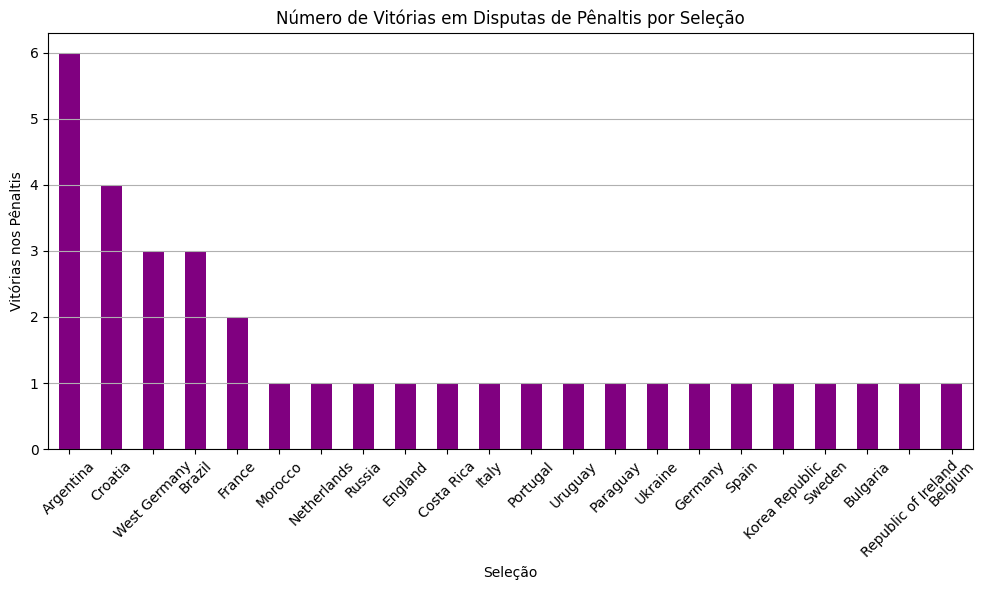

In [270]:
# Filtra apenas jogos com disputa de pênaltis (ambos os lados com valor)
penalty_games = matches.dropna(subset=['home_penalty', 'away_penalty'])

# Cria uma coluna com o vencedor
penalty_games['penalty_winner'] = penalty_games.apply(
    lambda row: row['home_team'] if row['home_penalty'] > row['away_penalty']
    else row['away_team'],
    axis=1
)

# Conta seleções únicas que venceram disputas de pênaltis
vencedores_unicos = penalty_games['penalty_winner'].nunique()

print(f"Seleções diferentes que já venceram disputas de pênaltis: {vencedores_unicos}")

# (Opcional) Quais são elas
print("\nSeleções:")
print(penalty_games['penalty_winner'].unique())
plt.figure(figsize=(10,6))
penalty_games['penalty_winner'].value_counts().plot(kind='bar', color='purple')
plt.title('Número de Vitórias em Disputas de Pênaltis por Seleção')
plt.xlabel('Seleção')
plt.ylabel('Vitórias nos Pênaltis')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [271]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long', 'total_goals', 'year', 'match_year'],
      dtype='object')

In [272]:
matches['year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
959    1970
960    1970
961    1970
962    1970
963    1970
Name: year, Length: 964, dtype: int32

In [273]:
import pandas as pd

# Converte para datetime
decision['date'] = pd.to_datetime(decision['date'])
# Cria coluna year para facilitar filtro
decision['year'] = decision['date'].dt.year

def get_features_for_team_year(decision, year, team, window_years=2):
    start_date = pd.to_datetime(f"{year - window_years}-01-01")
    end_date = pd.to_datetime(f"{year}-06-01")  # antes da Copa começar
    
    df = decision[
        ((decision['home_team'] == team) | (decision['away_team'] == team)) &
        (decision['date'] >= start_date) & (decision['date'] <= end_date)
    ]
    
    total_games = len(df)
    if total_games == 0:
        return {
            'total_games': 0,
            'wins': 0,
            'draws': 0,
            'losses': 0,
            'goals_scored': 0,
            'goals_conceded': 0,
            'win_rate': 0,
            'avg_goals_scored': 0,
            'avg_goals_conceded': 0,
        }
    
    wins = 0
    draws = 0
    losses = 0
    goals_scored = 0
    goals_conceded = 0
    
    for _, row in df.iterrows():
        if row['home_team'] == team:
            goals_scored += row['home_score']
            goals_conceded += row['away_score']
            if row['winner'] == team:
                wins += 1
            elif row['winner'] == 'Draw':
                draws += 1
            else:
                losses += 1
        else:
            goals_scored += row['away_score']
            goals_conceded += row['home_score']
            if row['winner'] == team:
                wins += 1
            elif row['winner'] == 'Draw':
                draws += 1
            else:
                losses += 1
    
    return {
        'total_games': total_games,
        'wins': wins,
        'draws': draws,
        'losses': losses,
        'goals_scored': goals_scored,
        'goals_conceded': goals_conceded,
        'win_rate': wins / total_games,
        'avg_goals_scored': goals_scored / total_games,
        'avg_goals_conceded': goals_conceded / total_games,
    }


def build_dataset_for_all_teams(decision, world_up, window_years=2):
    rows = []
    for _, row in world_up.iterrows():
        year = row['Year']
        # Pega times participantes da Copa daquele ano
        copa_matches = decision[(decision['year'] == year) & (decision['tournament'] == 'FIFA World Cup')]
        teams = set(copa_matches['home_team']).union(set(copa_matches['away_team']))
        champion = row['Champion']
        
        for team in teams:
            features = get_features_for_team_year(decision, year, team, window_years)
            features['Year'] = year
            features['Team'] = team
            features['IsChampion'] = 1 if team == champion else 0
            rows.append(features)
    
    df_features = pd.DataFrame(rows)
    return df_features

# Criar dataset
df_features = build_dataset_for_all_teams(decision, world_cup, window_years=2)
df_features.head(10)

,total_games,wins,draws,losses,goals_scored,goals_conceded,win_rate,avg_goals_scored,avg_goals_conceded,Year,Team,IsChampion
0,33,24,5,4,71,19,0.727273,2.151515,0.575758,2022,United States,0
1,26,15,7,4,67,30,0.576923,2.576923,1.153846,2022,Germany,0
2,19,7,6,6,23,19,0.368421,1.210526,1.000000,2022,Ghana,0
3,24,19,4,1,52,8,0.791667,2.166667,0.333333,2022,Brazil,0
4,26,9,9,8,38,32,0.346154,1.461538,1.230769,2022,Ecuador,0
5,26,11,6,9,46,36,0.423077,1.769231,1.384615,2022,Croatia,0
6,28,19,2,7,64,22,0.678571,2.285714,0.785714,2022,Denmark,0
7,29,10,9,10,23,25,0.344828,0.793103,0.862069,2022,Costa Rica,0
8,23,10,6,7,26,24,0.434783,1.130435,1.043478,2022,Uruguay,0
9,24,17,5,2,51,15,0.708333,2.125000,0.625000,2022,Morocco,0


In [274]:
df_features['IsChampion'].value_counts()

IsChampion
0    469
1     20
Name: count, dtype: int64

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

In [276]:
df_majority = df_features[df_features['IsChampion'] == 0]
df_minority = df_features[df_features['IsChampion'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=42)

X = df_balanced.drop(columns=['IsChampion', 'Year', 'Team'])
y = df_balanced['IsChampion']


In [277]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [278]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [279]:
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.9893617021276596
Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       141
           1       0.98      1.00      0.99       141

    accuracy                           0.99       282
   macro avg       0.99      0.99      0.99       282
weighted avg       0.99      0.99      0.99       282



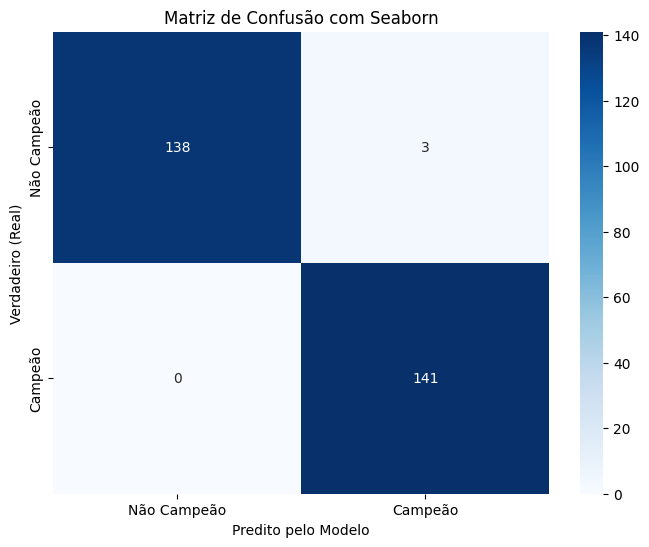

In [280]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusão com os dados corretos
cm = confusion_matrix(y_test, y_pred)

labels = ['Não Campeão', 'Campeão']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão com Seaborn')
plt.ylabel('Verdadeiro (Real)')
plt.xlabel('Predito pelo Modelo')
plt.show()


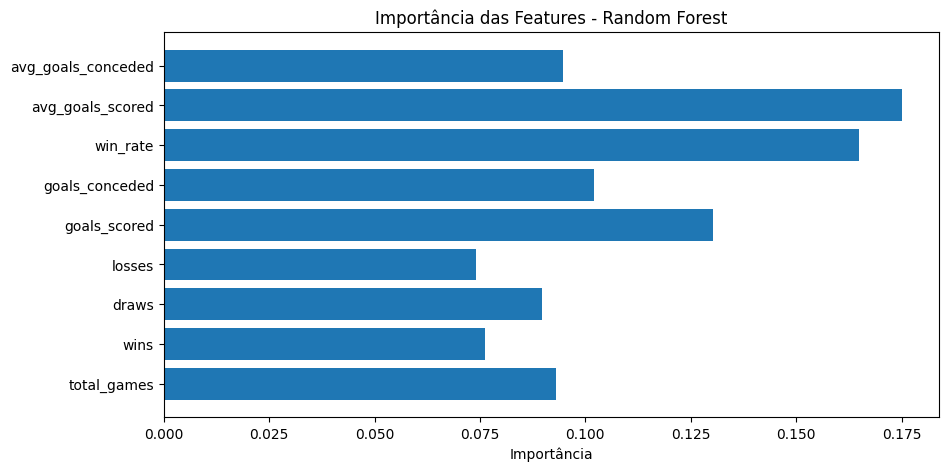

In [281]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

# Gráfico
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.show()
